# Initial CNN Model Attempt

In [199]:
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.layers as layers
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras.layers import Dense, Normalization
%matplotlib inline
import seaborn as sns
from sklearn import metrics

In [200]:
from keras.models import Sequential 
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, InputLayer
from keras.utils.np_utils import to_categorical

In [237]:
from sklearn import (
    linear_model, metrics, neural_network, pipeline, model_selection
)
from sklearn.impute import SimpleImputer

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import TimeSeriesSplit

### Part 1 Figuuring out how to deal with NaNs
Come to the coclusion just to use test data set Ford_1 for now.

In [201]:
Ford = pd.read_csv("Ford_Cleaned_Date.csv")
Ford.date = pd.to_datetime(Ford.date)
Ford = Ford.set_index("date")

In [202]:
Ford = Ford.iloc[14:, :]
Ford.shape

(801, 169)

In [203]:
pd.set_option('display.max_columns', None)

In [204]:
pd.DataFrame(Ford.isna().sum()).T
# we see that the gain, average gain, average loss and loss columns are causing large numbers of NA's
# will need to come back and solve this issue.

,Ford,F-150,Ford Bronco_x,Ford Mustang_x,Ford Stock,Open,High,Low,Close,Volume,Dividends,Stock Splits,Ford Motor Company,Ford Mustang_y,Ford F Series,Ford Bronco_y,Lincoln Navigator,Lincoln Aviator,Ford GT,dow_open,dow_high,dow_low,dow_close,dow_vol,nas_open,nas_high,nas_low,nas_close,nas_vol,Wiki_total,Google_total,Stock_total,Nas_total,Dow_total,Wiki_Moment_1,Wiki_Moment_2,Wiki_Moment_1_s,Wiki_Moment_2_s,Wiki_MAvg,Wiki_MAvg_s,Wiki_Disparity,Wiki_Disparity_s,Wiki_ROC,Wiki_ROC_s,Wiki_Rocp,Wiki_EMA,Wiki_diff,Wiki_gain,Wiki_loss,Wiki_avg_gain,Wiki_avg_loss,Wiki_rs,Wiki_RSI,Wiki_Move,Wiki_MAvg_Move,Wiki_MAvg_s_Move,Wiki_EMA_Move,Wiki_Disparity_Move,Wiki_Disparity_s_Move,Wiki_RSI_Move,Google_Moment_1,Google_Moment_2,Google_Moment_1_s,Google_Moment_2_s,Google_MAvg,Google_MAvg_s,Google_Disparity,Google_Disparity_s,Google_ROC,Google_ROC_s,Google_Rocp,Google_EMA,Google_diff,Google_gain,Google_loss,Google_avg_gain,Google_avg_loss,Google_rs,Google_RSI,Google_Move,Google_MAvg_Move,Google_MAvg_s_Move,Google_EMA_Move,Google_Disparity_Move,Google_Disparity_s_Move,Google_RSI_Move,Stock_Moment_1,Stock_Moment_2,Stock_Moment_1_s,Stock_Moment_2_s,Stock_MAvg,Stock_MAvg_s,Stock_Disparity,Stock_Disparity_s,Stock_ROC,Stock_ROC_s,Stock_Rocp,Stock_EMA,Stock_diff,Stock_gain,Stock_loss,Stock_avg_gain,Stock_avg_loss,Stock_rs,Stock_RSI,Stock_Move,Stock_MAvg_Move,Stock_MAvg_s_Move,Stock_EMA_Move,Stock_Disparity_Move,Stock_Disparity_s_Move,Stock_RSI_Move,Nas_Moment_1,Nas_Moment_2,Nas_Moment_1_s,Nas_Moment_2_s,Nas_MAvg,Nas_MAvg_s,Nas_Disparity,Nas_Disparity_s,Nas_ROC,Nas_ROC_s,Nas_Rocp,Nas_EMA,Nas_diff,Nas_gain,Nas_loss,Nas_avg_gain,Nas_avg_loss,Nas_rs,Nas_RSI,Nas_Move,Nas_MAvg_Move,Nas_MAvg_s_Move,Nas_EMA_Move,Nas_Disparity_Move,Nas_Disparity_s_Move,Nas_RSI_Move,Dow_Moment_1,Dow_Moment_2,Dow_Moment_1_s,Dow_Moment_2_s,Dow_MAvg,Dow_MAvg_s,Dow_Disparity,Dow_Disparity_s,Dow_ROC,Dow_ROC_s,Dow_Rocp,Dow_EMA,Dow_diff,Dow_gain,Dow_loss,Dow_avg_gain,Dow_avg_loss,Dow_rs,Dow_RSI,Dow_Move,Dow_MAvg_Move,Dow_MAvg_s_Move,Dow_EMA_Move,Dow_Disparity_Move,Dow_Disparity_s_Move,Dow_RSI_Move,target_1,target_2,target_3,target_4,target_5
0,0,0,0,0,0,6,6,6,6,6,6,6,0,0,0,0,0,0,0,4,4,4,4,4,4,4,4,4,4,0,0,6,4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,11,11,11,0,0,6,6,11,11,11,6,11,11,11,76,76,76,76,0,0,0,0,0,0,0,7,7,7,7,0,0,4,4,7,7,7,4,7,7,7,46,46,46,46,0,0,0,0,0,0,0,7,7,7,7,0,0,4,4,7,7,7,4,7,7,7,46,46,46,46,0,0,0,0,0,0,0,0,0,0,0,0


In [205]:
# Remove any infinitly large or small values
# Ford.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop remanining NaN or null values
#Ford = Ford.dropna()
#Ford.shape


In [206]:
# Ford 1, Basic Varaibles,  
Ford_1 = Ford[Ford.columns.drop(list(Ford.filter(regex='Move')))]
Ford_1 = Ford_1[["target_3", "Volume", 
                "Wiki_total", "Google_total", 
                "nas_close", "dow_close",
                 "Close", "nas_vol", 
                 "dow_vol"
                 ]]
Ford_1.head()  

,target_3,Volume,Wiki_total,Google_total,nas_close,dow_close,Close,nas_vol,dow_vol
date,,,,,,,,,
2019-01-23,1,45196900.0,14836.0,19.500000,7025.770020,24575.619141,7.562010,2.274420e+09,318600000.0
2019-01-24,1,79516400.0,15219.0,32.625000,7073.459961,24553.240234,7.797754,2.400290e+09,320170000.0
2019-01-25,0,53098800.0,14645.0,35.500000,7164.859863,24737.199219,8.033502,2.440840e+09,376890000.0
2019-01-28,1,42116300.0,14390.0,21.958333,7085.680176,24528.220703,7.852159,2.435480e+09,347170000.0
2019-01-29,1,30485000.0,14412.0,24.750000,7028.290039,24579.960938,7.942830,2.089690e+09,330870000.0


In [207]:
print(Ford_1.shape)
print(Ford_1.dropna().shape)
Ford_1.dtypes

(801, 9)
(795, 9)


target_3          int64
Volume          float64
Wiki_total      float64
Google_total    float64
nas_close       float64
dow_close       float64
Close           float64
nas_vol         float64
dow_vol         float64
dtype: object

In [208]:
Ford_1 = Ford_1.dropna()


## Part 2, Setting up Data to be useable with tensor flow

In [209]:
target = to_categorical(Ford_1['target_3'])

In [210]:
target

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       ...,
       [0., 1.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [211]:
Ford_1 = Ford_1.drop('target_3', axis=1)
Ford_1.head()

,Volume,Wiki_total,Google_total,nas_close,dow_close,Close,nas_vol,dow_vol
date,,,,,,,,
2019-01-23,45196900.0,14836.0,19.500000,7025.770020,24575.619141,7.562010,2.274420e+09,318600000.0
2019-01-24,79516400.0,15219.0,32.625000,7073.459961,24553.240234,7.797754,2.400290e+09,320170000.0
2019-01-25,53098800.0,14645.0,35.500000,7164.859863,24737.199219,8.033502,2.440840e+09,376890000.0
2019-01-28,42116300.0,14390.0,21.958333,7085.680176,24528.220703,7.852159,2.435480e+09,347170000.0
2019-01-29,30485000.0,14412.0,24.750000,7028.290039,24579.960938,7.942830,2.089690e+09,330870000.0


In [212]:
#splitting into training sets 
column_indices = {name: i for i, name in enumerate(Ford_1.columns)}

n = len(Ford_1)
train_f1 = Ford_1[0:int(n*0.7)]
val_f1 = Ford_1[int(n*0.7):int(n*0.9)]
test_f1 = Ford_1[int(n*0.9):]

train_f1t = target[0:int(n*0.7)]
val_f1t = target[int(n*0.7):int(n*0.9)]
test_f1t = target[int(n*0.9):]

num_features = Ford_1.shape[1]

In [213]:
# seporating out all non binary varibles to be normalized
f_list = ["Volume", 
            "Wiki_total", "Google_total", 
            "nas_close", "dow_close",
            "Close", "nas_vol", 
            "dow_vol"
            ]

In [214]:
#normalizing the data, may come back later to take normalization with moving averages to avoid allwoing
# the training set to have access to futre traing data, makes model more realistic
train_f1_mean = train_f1.mean()
train_f1_std = train_f1.std()

train_f1 = (train_f1 - train_f1_mean) / train_f1_std
val_f1 = (val_f1 - train_f1_mean) / train_f1_std
test_f1 = (test_f1 - train_f1_mean) / train_f1_std

In [215]:
train_f1

,Volume,Wiki_total,Google_total,nas_close,dow_close,Close,nas_vol,dow_vol
date,,,,,,,,
2019-01-23,-0.473952,0.189679,-0.916326,-1.297693,-1.103138,-0.380935,-0.737715,-0.275269
2019-01-24,0.585682,0.295486,1.135943,-1.274274,-1.112043,-0.252455,-0.662000,-0.262992
2019-01-25,-0.229977,0.136914,1.585487,-1.229390,-1.038843,-0.123973,-0.637608,0.180554
2019-01-28,-0.569067,0.066468,-0.531933,-1.268273,-1.121999,-0.222804,-0.640832,-0.051854
2019-01-29,-0.928190,0.072546,-0.095419,-1.296455,-1.101410,-0.173389,-0.848835,-0.179319
...,...,...,...,...,...,...,...,...
2021-04-09,-0.617261,-0.208961,-1.489658,2.078112,2.567628,2.202245,0.244007,-0.292395
2021-04-12,-0.621355,-0.178297,-1.861021,2.053465,2.545661,2.132575,0.438723,-0.206689
2021-04-13,-0.277611,-0.060887,-0.681781,2.125210,2.518552,2.036107,0.420755,-0.229288


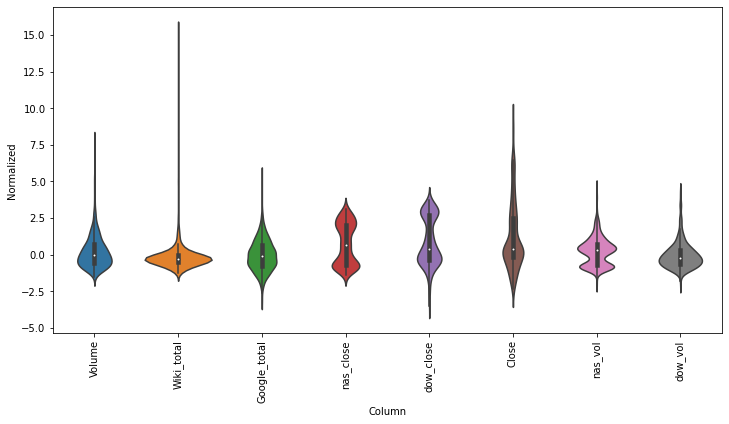

In [216]:
# Visual Distribution of the features
ford_1_std = (Ford_1 - train_f1_mean) / train_f1_std
ford_1_std = ford_1_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=ford_1_std)
_ = ax.set_xticklabels(Ford_1.keys(), rotation=90)

In [217]:
# Tensor Flow times series dataframe modifier


# format
# X                                             y
# [[[V1_0, V2_0], [V1_1, V2_1], [V1_2, V2_2]]]  [target_3]
# [[[V1_1, V2_1], [V1_2, V2_3], [V1_3, V2_3]]]  [target_4]
# [[[V1_2, V2_2], [V1_3, V2_3], [V1_4, V2_4]]]  [target_5]

def df_to_X_y2(df, target, window_size=5):
  df_as_np = df.to_numpy() # converts to matrix of numpy arrays
  X = []
  y = []
  for i in range(len(df_as_np)-window_size): # length of data frame - window_size so it does't take empty values at the end
    row = [r for r in df_as_np[i:i+window_size]] # grabs row i and all rows above within the window size length
    X.append(row) # creates 3 dimentional array, (# obseravtions, # rows in window, # features)
    label = target[i+window_size][0:] # pulls the target variable after the window, target varible needs to be column zero in this 
    y.append(label) # returns (N,) martix of targets i+window_length time periods away
  return np.array(X), np.array(y)

In [218]:
Xf1_train, yf1_train = df_to_X_y2(train_f1, train_f1t)
Xf1_val, yf1_val = df_to_X_y2(val_f1, val_f1t)
Xf1_test, yf1_test = df_to_X_y2(test_f1, test_f1t)

In [219]:
from keras.models import Sequential 
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, InputLayer
from keras.utils.np_utils import to_categorical

In [220]:
# define model
n_steps = 5
n_features = 8

model = Sequential()
model.add(Conv1D(filters=5, kernel_size=2, activation='relu', input_shape=(n_steps,n_features))) 
model.add(MaxPooling1D(pool_size=2)) 
model.add(Flatten())
model.add(Dense(50, activation='relu')) 
model.add(Dense(2, activation='softmax')) # was getting lots of errors, apparently for binary classification needs just 1 in its shape???
# this was the explination I got after typing in error;  
# ValueError: `logits` and `labels` must have the same shape, received ((None, 2) vs (None, 1))
# thought binary classification needed output of 2 though

model.compile(optimizer='adam', loss='binary_crossentropy',
                   metrics=["accuracy"])

model.summary()

Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_51 (Conv1D)          (None, 4, 5)              85        
                                                                 
 max_pooling1d_35 (MaxPoolin  (None, 2, 5)             0         
 g1D)                                                            
                                                                 
 flatten_28 (Flatten)        (None, 10)                0         
                                                                 
 dense_56 (Dense)            (None, 50)                550       
                                                                 
 dense_57 (Dense)            (None, 2)                 102       
                                                                 
Total params: 737
Trainable params: 737
Non-trainable params: 0
_______________________________________________________

In [221]:
model.fit(Xf1_train,yf1_train,epochs=10,  validation_data=(Xf1_val, yf1_val))

Epoch 1/10
18/18 [==============================] - 1s 13ms/step - loss: 0.7016 - accuracy: 0.5191 - val_loss: 0.6951 - val_accuracy: 0.5130
Epoch 2/10
18/18 [==============================] - 0s 4ms/step - loss: 0.6867 - accuracy: 0.5354 - val_loss: 0.6991 - val_accuracy: 0.5065
Epoch 3/10
18/18 [==============================] - 0s 3ms/step - loss: 0.6824 - accuracy: 0.5644 - val_loss: 0.6970 - val_accuracy: 0.5195
Epoch 4/10
18/18 [==============================] - 0s 3ms/step - loss: 0.6792 - accuracy: 0.5626 - val_loss: 0.6952 - val_accuracy: 0.5260
Epoch 5/10
18/18 [==============================] - 0s 4ms/step - loss: 0.6776 - accuracy: 0.5753 - val_loss: 0.6941 - val_accuracy: 0.5260
Epoch 6/10
18/18 [==============================] - 0s 3ms/step - loss: 0.6754 - accuracy: 0.5699 - val_loss: 0.6950 - val_accuracy: 0.5260
Epoch 7/10
18/18 [==============================] - 0s 4ms/step - loss: 0.6735 - accuracy: 0.5826 - val_loss: 0.6947 - val_accuracy: 0.5325
Epoch 8/10
18/18 [=

In [222]:
hat = model.predict(Xf1_test)

In [223]:
hat = (hat > 0.5) # for basic accuracy ratio
metrics.accuracy_score(yf1_test,hat)

0.6

In [224]:
hat

array([[ True, False],
       [ True, False],
       [ True, False],
       [False,  True],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [False,  True],
       [False,  True],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [ Tr

In [225]:
# model repeated but with kernal size = window size, My understading may be wrong but kernal size should just be the size of the window no?

model = Sequential()
model.add(Conv1D(filters=5, kernel_size=5, activation='relu', input_shape=(n_steps,n_features))) 
model.add(MaxPooling1D()) 
model.add(Flatten())
model.add(Dense(50, activation='relu')) 
model.add(Dense(2, activation='softmax')) 

model.compile(optimizer='adam', loss='binary_crossentropy',
                   metrics=["accuracy"])


ValueError: Exception encountered when calling layer "max_pooling1d_36" (type MaxPooling1D).

Negative dimension size caused by subtracting 2 from 1 for '{{node max_pooling1d_36/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 2, 1, 1], padding="VALID", strides=[1, 2, 1, 1]](max_pooling1d_36/ExpandDims)' with input shapes: [?,1,1,5].

Call arguments received:
  • inputs=tf.Tensor(shape=(None, 1, 5), dtype=float32)

In [226]:
model2 = Sequential()
model2.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps,n_features))) 
model2.add(Conv1D(filters=32, kernel_size=2, activation='relu')) 
model2.add(MaxPooling1D(pool_size=2)) 
model2.add(Flatten())
model2.add(Dense(50, activation='relu')) 
model2.add(Dense(2, activation='softmax')) 

model2.compile(optimizer='adam', loss='binary_crossentropy',
                   metrics=["accuracy"])
model2.fit(Xf1_train,yf1_train,epochs=10,  validation_data=(Xf1_val, yf1_val))

Epoch 1/10
18/18 [==============================] - 4s 172ms/step - loss: 0.6945 - accuracy: 0.5336 - val_loss: 0.7032 - val_accuracy: 0.5065
Epoch 2/10
18/18 [==============================] - 0s 9ms/step - loss: 0.6847 - accuracy: 0.5608 - val_loss: 0.7045 - val_accuracy: 0.5065
Epoch 3/10
18/18 [==============================] - 0s 5ms/step - loss: 0.6792 - accuracy: 0.5590 - val_loss: 0.7299 - val_accuracy: 0.5065
Epoch 4/10
18/18 [==============================] - 0s 8ms/step - loss: 0.6729 - accuracy: 0.5862 - val_loss: 0.7248 - val_accuracy: 0.5065
Epoch 5/10
18/18 [==============================] - 0s 10ms/step - loss: 0.6677 - accuracy: 0.6062 - val_loss: 0.7693 - val_accuracy: 0.5065
Epoch 6/10
18/18 [==============================] - 0s 8ms/step - loss: 0.6632 - accuracy: 0.6025 - val_loss: 0.7901 - val_accuracy: 0.5065
Epoch 7/10
18/18 [==============================] - 0s 7ms/step - loss: 0.6553 - accuracy: 0.6425 - val_loss: 0.8314 - val_accuracy: 0.5065
Epoch 8/10
18/18 

In [227]:
hat2 = model2.predict(Xf1_test)
hat2 = (hat2 > 0.5)
metrics.accuracy_score(yf1_test, hat2)


0.5866666666666667

In [228]:
hat2, yf1_test

(array([[ True, False],
        [ True, False],
        [ True, False],
        [ True, False],
        [ True, False],
        [ True, False],
        [ True, False],
        [ True, False],
        [ True, False],
        [ True, False],
        [ True, False],
        [ True, False],
        [ True, False],
        [ True, False],
        [ True, False],
        [ True, False],
        [ True, False],
        [ True, False],
        [ True, False],
        [ True, False],
        [ True, False],
        [ True, False],
        [ True, False],
        [ True, False],
        [ True, False],
        [ True, False],
        [ True, False],
        [ True, False],
        [ True, False],
        [ True, False],
        [ True, False],
        [ True, False],
        [ True, False],
        [ True, False],
        [ True, False],
        [ True, False],
        [ True, False],
        [ True, False],
        [ True, False],
        [ True, False],
        [ True, False],
        [ True, 

In [ ]:
# Model three failed, seems to be an issue with adding convoiltion layer again agter pooling
model3 = Sequential()
model3.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps,n_features))) 
model3.add(Conv1D(filters=32, kernel_size=2, activation='relu'))
model3.add(MaxPooling1D(pool_size=2)) 
model3.add(Conv1D(filters=32, kernel_size=2, activation='relu')) 
model3.add(Conv1D(filters=32, kernel_size=2, activation='relu')) 
model3.add(MaxPooling1D(pool_size=2)) 
model3.add(Flatten())
model3.add(Dense(25, activation='relu')) 
model3.add(Dense(2, activation='softmax')) 

model3.compile(optimizer='adam', loss='binary_crossentropy',
                   metrics=["accuracy"])
model3.fit(Xf1_train,yf1_train,epochs=10,  validation_data=(Xf1_val, yf1_val))

ValueError: Exception encountered when calling layer "conv1d_24" (type Conv1D).

Negative dimension size caused by subtracting 2 from 1 for '{{node conv1d_24/Conv1D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](conv1d_24/Conv1D/ExpandDims, conv1d_24/Conv1D/ExpandDims_1)' with input shapes: [?,1,1,32], [1,2,32,32].

Call arguments received:
  • inputs=tf.Tensor(shape=(None, 1, 32), dtype=float32)

In [235]:
model4 = Sequential()
model4.add(Conv1D(filters=4, kernel_size=2, activation='relu', input_shape=(n_steps,n_features))) 
model4.add(Conv1D(filters=32, kernel_size=2, activation='relu'))
model4.add(MaxPooling1D(pool_size=2)) 
model4.add(Flatten())
model4.add(Dense(100, activation='relu')) 
model4.add(Dense(2, activation='softmax')) 

model4.compile(optimizer='adam', loss='binary_crossentropy',
                   metrics=["accuracy"])
model4.fit(Xf1_train,yf1_train,epochs=30,  validation_data=(Xf1_val, yf1_val))

Epoch 1/30
18/18 [==============================] - 1s 16ms/step - loss: 0.6941 - accuracy: 0.4900 - val_loss: 0.7112 - val_accuracy: 0.5065
Epoch 2/30
18/18 [==============================] - 0s 12ms/step - loss: 0.6889 - accuracy: 0.5499 - val_loss: 0.7134 - val_accuracy: 0.5065
Epoch 3/30
18/18 [==============================] - 0s 13ms/step - loss: 0.6873 - accuracy: 0.5481 - val_loss: 0.7219 - val_accuracy: 0.5065
Epoch 4/30
18/18 [==============================] - 0s 8ms/step - loss: 0.6853 - accuracy: 0.5717 - val_loss: 0.7177 - val_accuracy: 0.5065
Epoch 5/30
18/18 [==============================] - 0s 7ms/step - loss: 0.6837 - accuracy: 0.5826 - val_loss: 0.7105 - val_accuracy: 0.5065
Epoch 6/30
18/18 [==============================] - 0s 6ms/step - loss: 0.6818 - accuracy: 0.5844 - val_loss: 0.7280 - val_accuracy: 0.5065
Epoch 7/30
18/18 [==============================] - 0s 6ms/step - loss: 0.6796 - accuracy: 0.5862 - val_loss: 0.7221 - val_accuracy: 0.5065
Epoch 8/30
18/18 

In [236]:
hat4 = model4.predict(Xf1_test)
hat4


array([[9.87959027e-01, 1.20409699e-02],
       [9.85336602e-01, 1.46633862e-02],
       [9.89741087e-01, 1.02589587e-02],
       [9.95198071e-01, 4.80197370e-03],
       [9.94870067e-01, 5.12992870e-03],
       [9.94799256e-01, 5.20075345e-03],
       [9.89107072e-01, 1.08929323e-02],
       [9.87193882e-01, 1.28061231e-02],
       [9.90194976e-01, 9.80507582e-03],
       [9.89267409e-01, 1.07325185e-02],
       [9.74742532e-01, 2.52574235e-02],
       [9.58638012e-01, 4.13619503e-02],
       [9.65297520e-01, 3.47024798e-02],
       [9.73175704e-01, 2.68242583e-02],
       [9.75861192e-01, 2.41388865e-02],
       [9.79127705e-01, 2.08722446e-02],
       [9.62102830e-01, 3.78972106e-02],
       [9.96372223e-01, 3.62781668e-03],
       [9.99631166e-01, 3.68771522e-04],
       [9.99789178e-01, 2.10787766e-04],
       [9.99812424e-01, 1.87582496e-04],
       [9.98481810e-01, 1.51816686e-03],
       [9.96935129e-01, 3.06482962e-03],
       [9.94232237e-01, 5.76768164e-03],
       [9.954244

In [ ]:
hat4 = (hat4 > 0.5)
metrics.accuracy_score(yf1_test, hat4)

In [234]:
hat4, hat2

(array([[ True, False],
        [ True, False],
        [ True, False],
        [ True, False],
        [ True, False],
        [ True, False],
        [ True, False],
        [ True, False],
        [ True, False],
        [ True, False],
        [ True, False],
        [ True, False],
        [ True, False],
        [ True, False],
        [ True, False],
        [ True, False],
        [ True, False],
        [ True, False],
        [ True, False],
        [ True, False],
        [ True, False],
        [ True, False],
        [ True, False],
        [ True, False],
        [ True, False],
        [ True, False],
        [ True, False],
        [ True, False],
        [ True, False],
        [ True, False],
        [ True, False],
        [ True, False],
        [ True, False],
        [ True, False],
        [ True, False],
        [ True, False],
        [ True, False],
        [ True, False],
        [ True, False],
        [ True, False],
        [ True, False],
        [ True, 